In [12]:
#| echo: false
#| code-fold: false
#| output: false
import sys, os, h5py, bz2, matplotlib.pyplot as plt, importlib, itertools
from tqdm.auto import tqdm, trange
from collections import OrderedDict
from IPython.display import set_matplotlib_formats
import seaborn
from ipywidgets import interactive, fixed
set_matplotlib_formats('retina')
plt.style.use('dark_background')
# plt.style.use('default')
import plotting
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/96/4c5n4tpd02l_82z2ppsmr5_40000gn/T/ipykernel_18528/2469865785.py:10: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



## Computing files

Before running the below commands make sure you have correctly installed and setup your environment.



Download the dataset to `tmp` directory (create it first). From the base folder run

```python
laueotx realdata compute 0 --conf tmp/config_realdata_fega10_v10_demo.yaml -o results/realdata_fega10_v10_demo/ --n-grid 1000
laueotx realdata compute 1 --conf tmp/config_realdata_fega10_v10_demo.yaml -o results/realdata_fega10_v10_demo/ --n-grid 1000
laueotx realdata merge 0 1 --conf tmp/config_realdata_fega10_v10_demo.yaml -o results/realdata_fega10_v10_demo/ --n-grid 1000
```

We will be analysing the merged output of the previous commands


In [2]:
#| echo: true
#| code-fold: false
fname = '../../results/realdata_fega10_v10_demo/analyze_sample__fega10_v10__merged.h5'

In [85]:
#| echo: true
#| code-fold: false
#| output: false
spot_loss, s_obs, s_mod, inds_mod, inds_obs, p_lam, s2g_mod_assign, s2g_obs_assign, s2s_mod_assign, s2s_obs_assign = plotting.load_sample(fname)

In [4]:
a_est, x_est = plotting.load_grain_params(fname)
plotting.plot_scatter3d_sample(a_est, x_est)

In [5]:
omegas = range(0,360,4)

## Plot grain statistics

In [6]:
plotting.print_nspots_per_det(inds_obs[1], s2g_obs_assign, tag='detected ')
plotting.print_nspots_per_det(inds_mod[1], s2g_mod_assign, tag='model    ')

spots=detected  total      n_spots=269181 assigned  15698 [5.83%]
spots=detected  detector=0 n_spots=197047 assigned  12959 [6.58%]
spots=detected  detector=1 n_spots= 72134 assigned   2739 [3.80%]
spots=model     total      n_spots= 18889 assigned  15698 [83.11%]
spots=model     detector=0 n_spots= 15363 assigned  12959 [84.35%]
spots=model     detector=1 n_spots=  3526 assigned   2739 [77.68%]


In [8]:
#| column: screen
plotting.plotly_grain_stats(s2s_mod_assign, s2s_obs_assign, s2g_mod_assign, s2g_obs_assign, s_obs, s_mod, inds_mod, inds_obs)

n_grains=17


## Plot prototype loss

In [9]:
#| column: screen
plotting.plotly_spot_loss(fname, n_max=None, xscale='linear', yscale='linear')

## Plot spot assignment

In [208]:
#| column: screen
plotting.plotly_scatter_spots_assignment_per_angle(s_obs=s_obs, inds_obs=inds_obs, s_mod=s_mod, inds_mod=inds_mod, spot_mod_assign=s2g_mod_assign, p_lam=p_lam, ind_angle=1, omegas=omegas, color_obs='darkgrey', lw=0.5)

In [216]:
#| column: screen
plotting.plotly_scatter_spots_assignment_per_grain(s_obs=s_obs, inds_obs=inds_obs, s_mod=s_mod, inds_mod=inds_mod, spot_mod_assign=s2g_mod_assign, spot_obs_assign=s2g_obs_assign, p_lam=p_lam, ind_grain=1, omegas=omegas, color_obs='darkgrey', lw=0.5)

## Plot spot match with wavelength

In [80]:
inds_mod[2]

array([ 0,  0,  0, ..., 16, 16, 16], dtype=int32)

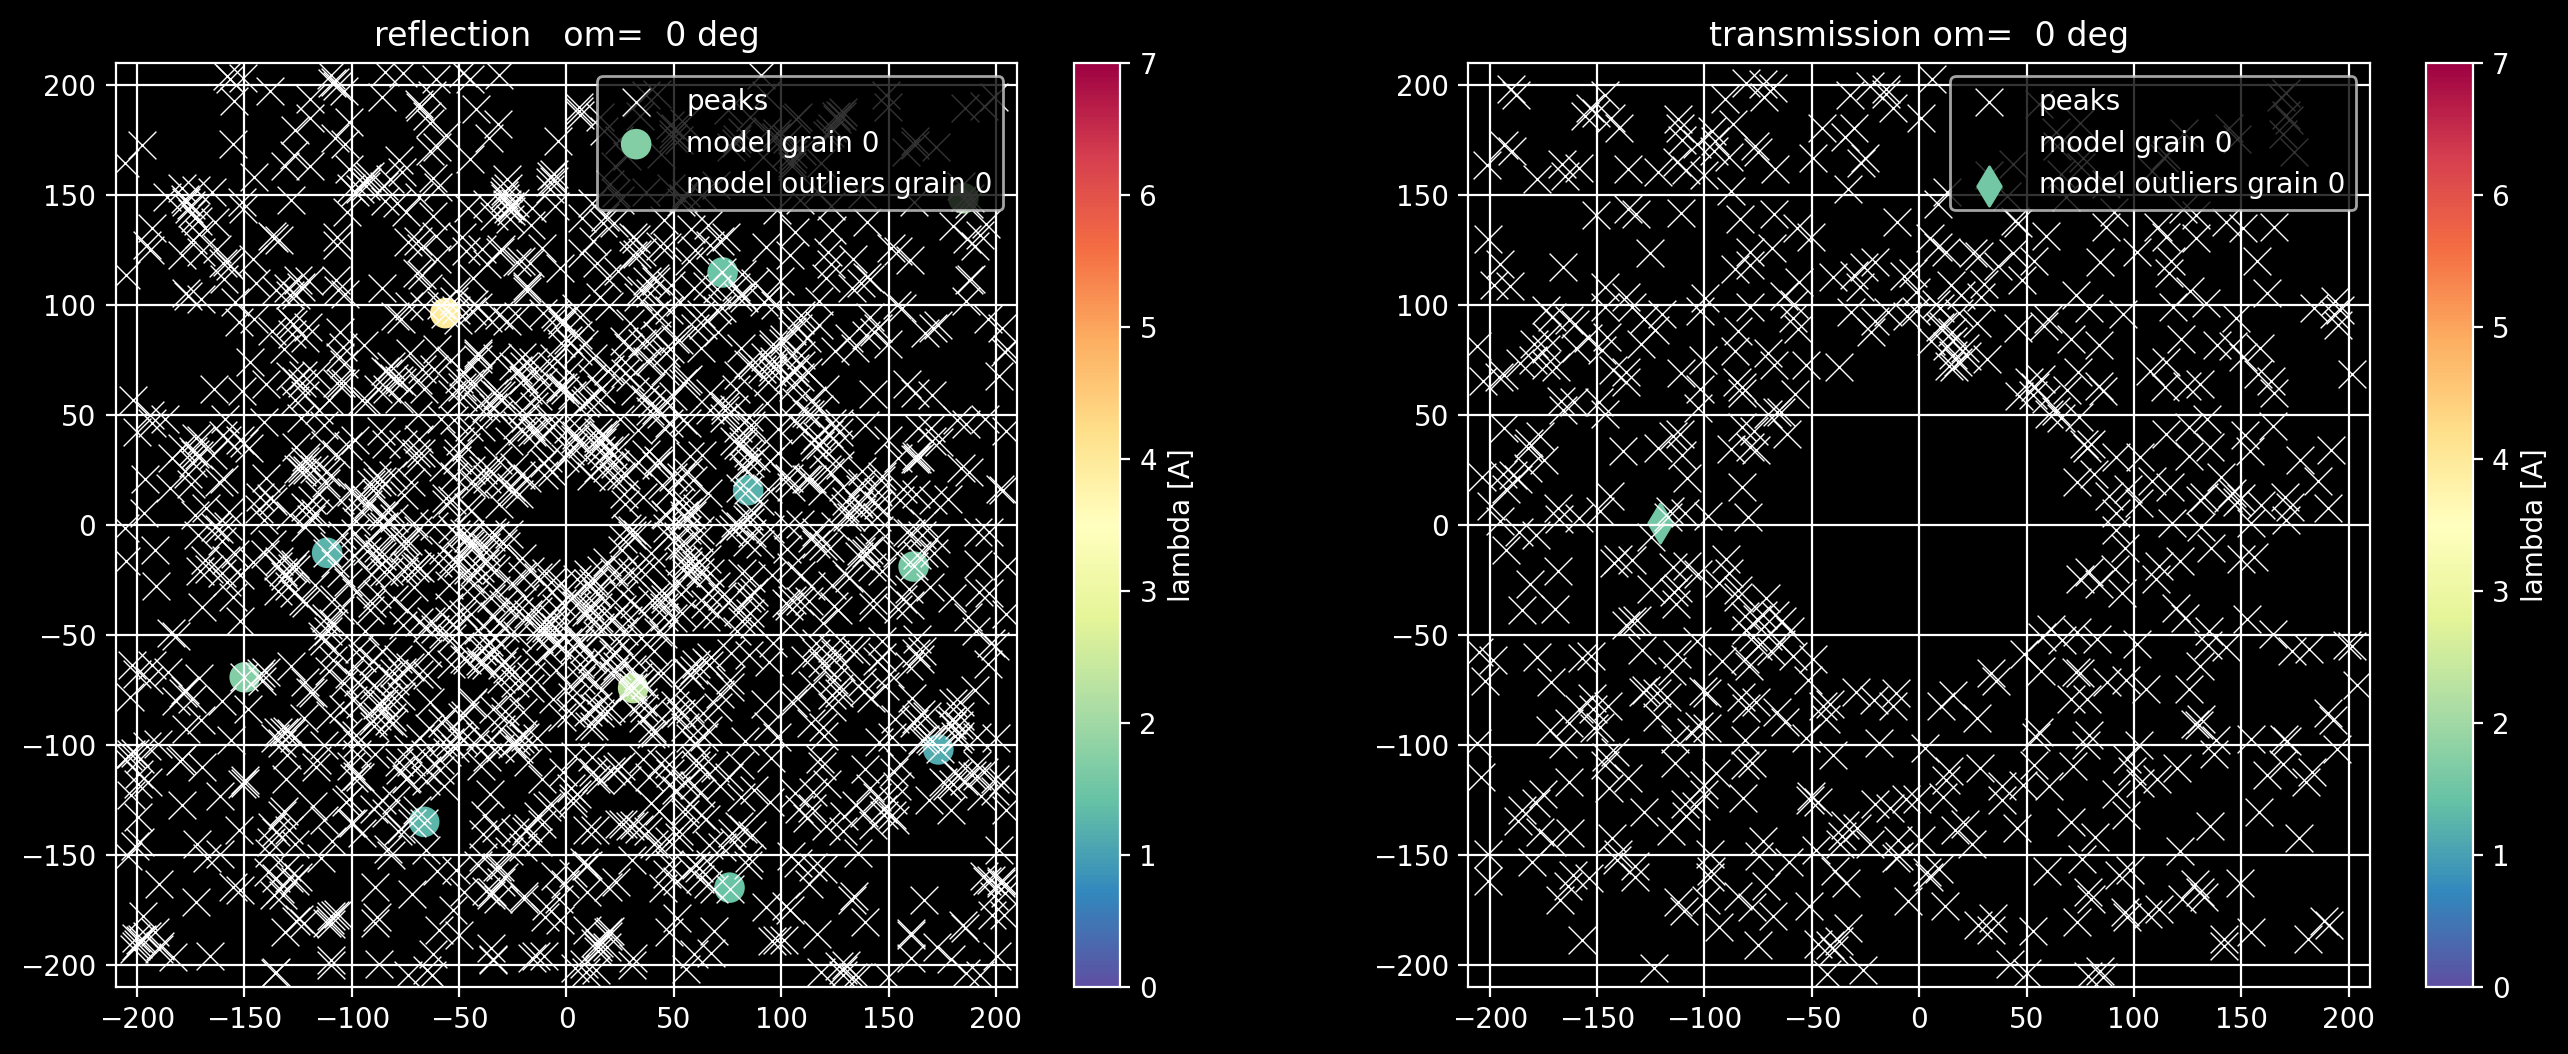

In [10]:
#| column: screen
plotting.scatter_spots_obs_mod_per_angle_interactive(s_obs=s_obs, inds_obs=inds_obs, s_mod=s_mod, inds_mod=inds_mod, p_lam=p_lam, spot_mod_assign=s2g_mod_assign, spot_obs_assign=s2g_obs_assign, ia=0, ig=0, omegas=omegas, lambda_lims=[0, 7], lam_vals=False, color_obs='w', lw=0.5)

## Plot match per grain

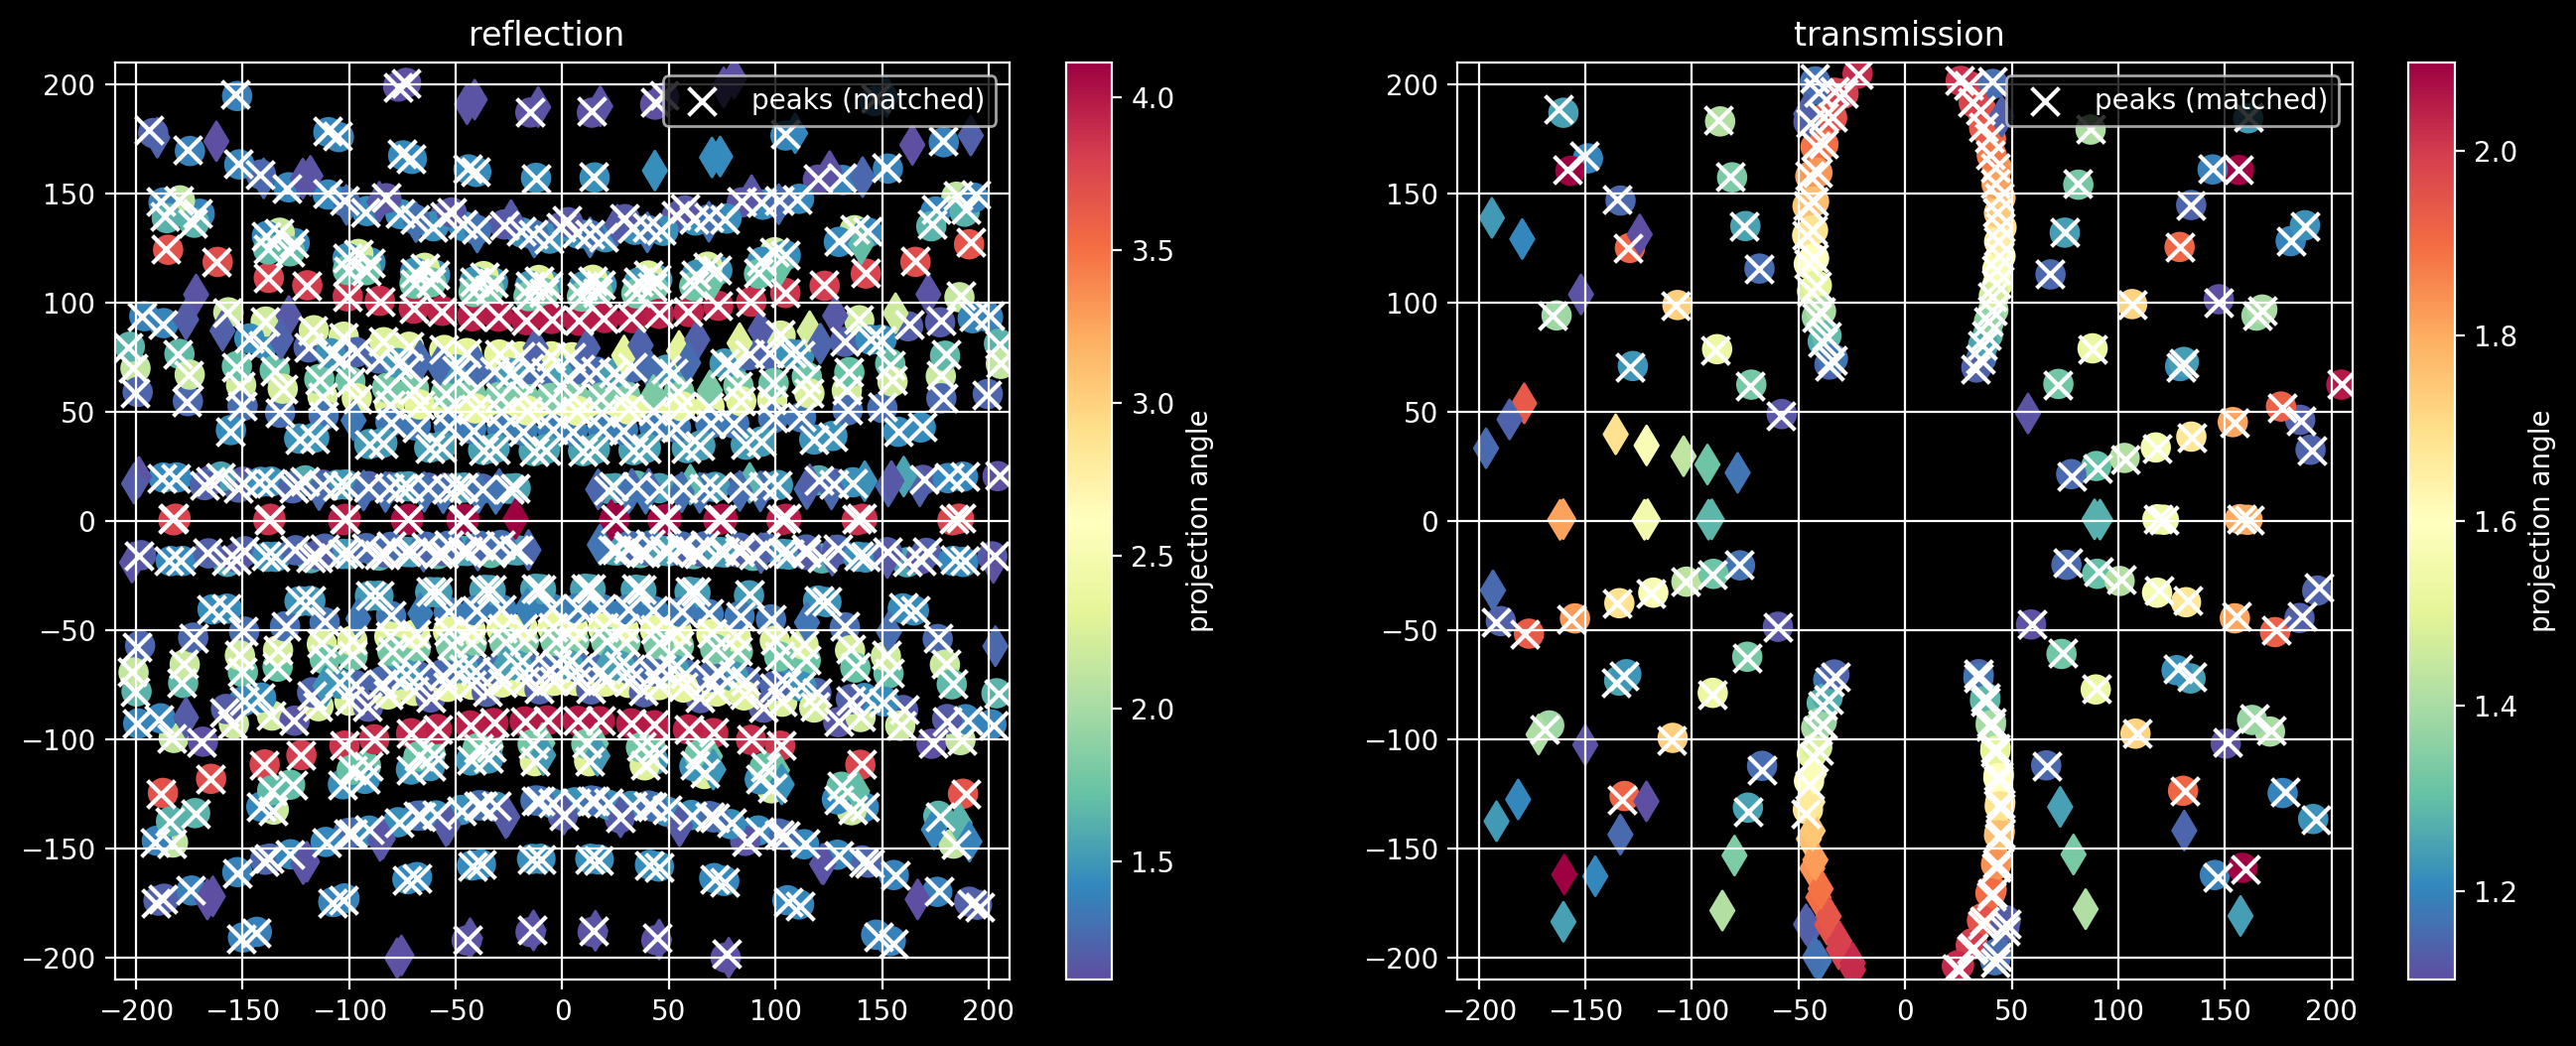

In [11]:
#| column: screen
plotting.scatter_spots_assignment_per_grain_interactive(s_obs=s_obs, inds_obs=inds_obs, s_mod=s_mod, inds_mod=inds_mod, p_lam=p_lam, s2g_mod_assign=s2g_mod_assign, s2g_obs_assign=s2g_obs_assign, ig=0, omegas=omegas, color_obs='w')

# test stuff

In [116]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import datetime
import plotly.express as px

periods = 200
cols = list('ABCD')

np.random.seed(123)
df = pd.DataFrame(np.random.randint(-10, 12, size=(periods, len(cols))),
                  columns=cols)
datelist = pd.date_range(datetime.datetime(2020, 1, 1).strftime('%Y-%m-%d'),
                         periods=periods).tolist()
df['dates'] = datelist 
df = df.set_index(['dates'])
df.index = pd.to_datetime(df.index)
df.iloc[0] = 0
df = df.cumsum()

# # plotly
fig = go.Figure()
colors = px.colors.qualitative.Plotly

# set up multiple traces
for col in df.columns:
    fig.add_trace(go.Scatter(x=df.index,
                             y=df[col],
                             name  = col,
                             visible=True
                            )
                 )

um = [ {} for _ in range(len(df.columns)) ]
buttons = []
menuadjustment = 0.15

buttonX = -0.1
buttonY = 1 + menuadjustment
for i, col in enumerate(df.columns):
    button = dict(method='restyle',
                  label=col,
                  visible=True,
                  args=[{'visible':True,
                         'line.color' : colors[i]}, [i]],
                  args2 = [{'visible': False,
                            'line.color' : colors[i]}, [i]],
                 )
    
    # adjust some button features
    buttonY = buttonY-menuadjustment
    um[i]['buttons'] = [button]
    um[i]['showactive'] = False
    um[i]['y'] = buttonY
    um[i]['x'] = buttonX

# add a button to toggle all traces on and off
button2 = dict(method='restyle',
               label='All',
               visible=True,
               args=[{'visible':True}],
               args2 = [{'visible': False}],
               )
# assign button2 to an updatemenu and make some adjustments
um.append(dict())
um[i+1]['buttons'] = [button2]
um[i+1]['showactive'] = True
um[i+1]['y']=buttonY - menuadjustment
um[i+1]['x'] = buttonX
    
# add dropdown menus to the figure
fig.update_layout(showlegend=True, updatemenus=um)

# adjust button type
for m in fig.layout.updatemenus:
    m['type'] = 'buttons'

f = fig.full_figure_for_development(warn=False)
fig.show()

ValueError: 
Full figure generation requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
